### AccelerateAI - Tree based models for Classification and Regression

In this notebook we will look at training a decision tree classifier with imbalanced dataset

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt

In [32]:
# Create a synthetic imbalanced dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=3)

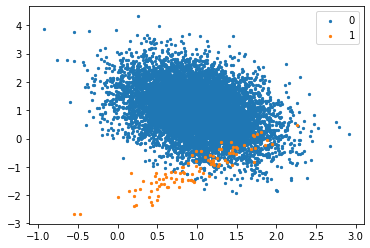

In [33]:
# Summarize the class distribution
counter = Counter(y)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), s = 5)

plt.legend()
plt.show()

In [34]:
# Fit a decision tree
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.741


In [35]:
# Fit a decision tree with class weights
weights = {0:1.0, 1:100.0}
model = DecisionTreeClassifier(class_weight=weights)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.748


In [36]:
# Run a Grid Search 
balance = [{0:1,1:1}, {0:1,1:10}, {0:1,1:50}, {0:1,1:100}, {0:1,1:500}]

model = DecisionTreeClassifier()
param_grid = dict(class_weight=balance)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
grid_result = grid.fit(X, y)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

Best: 0.755875 using {'class_weight': {0: 1, 1: 50}}
0.740640 with: {'class_weight': {0: 1, 1: 1}}
0.754175 with: {'class_weight': {0: 1, 1: 10}}
0.755875 with: {'class_weight': {0: 1, 1: 50}}
0.749343 with: {'class_weight': {0: 1, 1: 100}}
0.747559 with: {'class_weight': {0: 1, 1: 500}}


In [37]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.880
